In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bq.queries import run_query

In [7]:
# GDelt project
events = pd.DataFrame(run_query('SELECT * From `gdelt-bq.gdeltv2.events` limit 100000'))

Running query: SELECT * From `gdelt-bq.gdeltv2.events` limit 100000


In [15]:
events.head(n=20)

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,422910362,20150405,201504,2015,2015.2603,None,None,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20150405101500,http://www.bedfordshire-news.co.uk/Time-s-runn...
1,501670382,20160113,201601,2016,2016.0356,None,None,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20160113001500,http://hronika.info/kriminal/112968-gorit-odes...
2,476664499,20151016,201510,2015,2015.7836,LAB,EMPLOYEE,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20151016111500,http://www.centralmaine.com/2015/10/16/vigilan...
3,519583539,20160310,201603,2016,2016.1918,LAB,UNIONS,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20160310011500,http://www.elespectador.com/noticias/economia/...
4,424625711,20150411,201504,2015,2015.2767,SPYSPY,INTELLIGENCE,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20150411171500,http://www.sunstar.com.ph/cebu/local-news/2015...
5,477662015,20151020,201510,2015,2015.7945,DZAJUD,ORAN,DZA,None,None,...,0,None,None,None,None,NaN,NaN,None,20151020050000,http://www.eltribuno.info/denuncian-un-juez-fe...
6,497067598,20151225,201512,2015,2015.9726,COPGOV,DEPUTY,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20151225011500,http://www.thehindu.com/todays-paper/tp-nation...
7,411431669,20150222,201502,2015,2015.1425,USAMED,ASSOCIATED PRESS,USA,None,None,...,0,None,None,None,None,NaN,NaN,None,20150222221500,http://www.wctv.tv/news/floridanews/headlines/...
8,476561675,20151016,201510,2015,2015.7836,GHA,VOLTA,GHA,None,None,...,0,None,None,None,None,NaN,NaN,None,20151016040000,http://graphic.com.gh/news/general-news/51507-...
9,487061838,20151121,201511,2015,2015.8795,GOV,GOVERNMENT,None,None,None,...,0,None,None,None,None,NaN,NaN,None,20151121074500,http://www.leadership.ng/news/476703/dsc-boss-...


In [81]:
# { event_code: event_name }
event_codes = pd.read_json('../data/cameo_mapping.json', orient='index')
event_codes = event_codes.rename(columns={0: 'Description'})
event_codes = event_codes.reset_index().rename(columns={'index': 'EventCode'})

events['EventCode'] = events['EventCode'].astype(str)
event_codes['EventCode'] = event_codes['EventCode'].astype(str)

In [82]:
event_codes.head(n=20)

,EventCode,Description
0,1,MAKE PUBLIC STATEMENT
1,10,"Make statement, not specified below"
2,11,Decline comment
3,12,Make pessimistic comment
4,13,Make optimistic comment
5,14,Consider policy option
6,15,Acknowledge or claim responsibility
7,16,Deny responsibility
8,17,Engage in symbolic act
9,18,Make empathetic comment


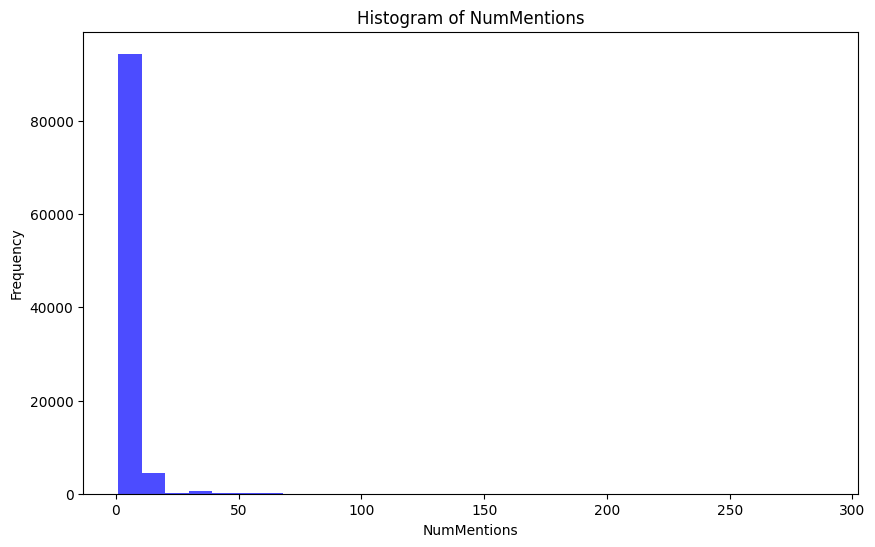

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(events['NumMentions'], bins=30, color='blue', alpha=0.7)
plt.xlabel('NumMentions')
plt.ylabel('Frequency')
plt.title('Histogram of NumMentions')
plt.show()

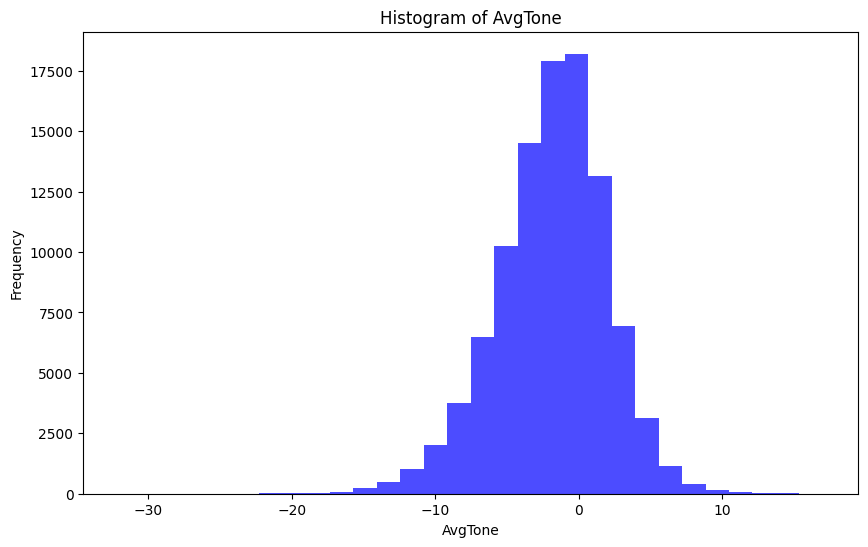

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(events['AvgTone'], bins=30, color='blue', alpha=0.7)
plt.xlabel('AvgTone')
plt.ylabel('Frequency')
plt.title('Histogram of AvgTone')
plt.show()

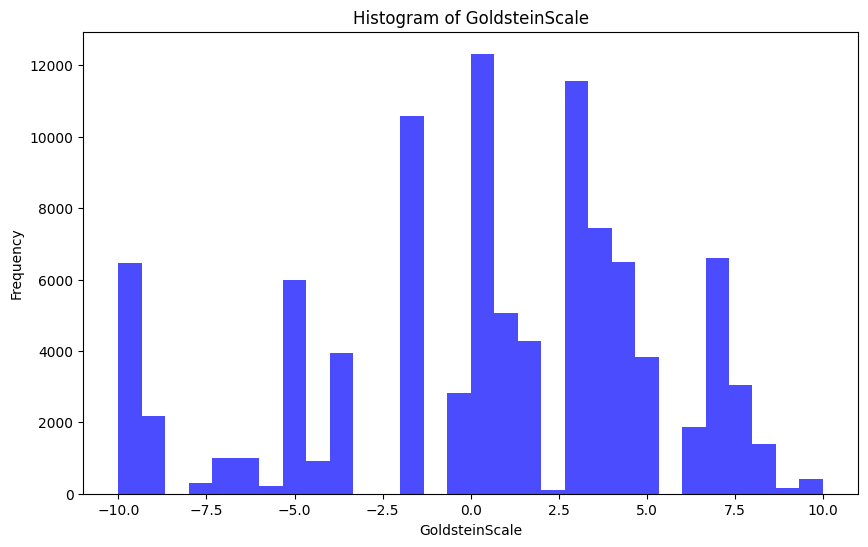

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(events['GoldsteinScale'], bins=30, color='blue', alpha=0.7)
plt.xlabel('GoldsteinScale')
plt.ylabel('Frequency')
plt.title('Histogram of GoldsteinScale')
plt.show()

In [98]:
# Group by EventCode and sum the GoldsteinScale
events_grouped = events.groupby('EventCode')['GoldsteinScale'].sum().reset_index()
events_grouped = events_grouped.sort_values('GoldsteinScale', ascending=False)
events_grouped

,EventCode,GoldsteinScale
119,20,20067.000000
174,51,17523.600009
187,71,16391.000003
162,36,15364.000000
172,46,14427.000000
...,...,...
99,180,-8964.000000
95,173,-11555.000000
30,120,-12096.000000
115,193,-18270.000000


In [99]:
events['EventCode'] = events['EventCode'].astype(str).str.lstrip('0')
# Merge with event_codes to get the description
events_grouped = events_grouped.merge(event_codes, on='EventCode', how='left')
# remove Description_y and rename Description_x to Description

# events_grouped.dropna(inplace=True)
events_grouped

,EventCode,GoldsteinScale,Description
0,20,20067.000000,"Make an appeal or request, not specified below"
1,20,20067.000000,USE UNCONVENTIONAL MASS VIOLENCE
2,51,17523.600009,Praise or endorse
3,71,16391.000003,Provide economic aid
4,36,15364.000000,Express intent to meet or negotiate
...,...,...,...
224,180,-8964.000000,"Use unconventional violence, not specified below"
225,173,-11555.000000,"Arrest, detain, or charge with legal action"
226,120,-12096.000000,"Reject, not specified below"
227,193,-18270.000000,Fight with small arms and light weapons


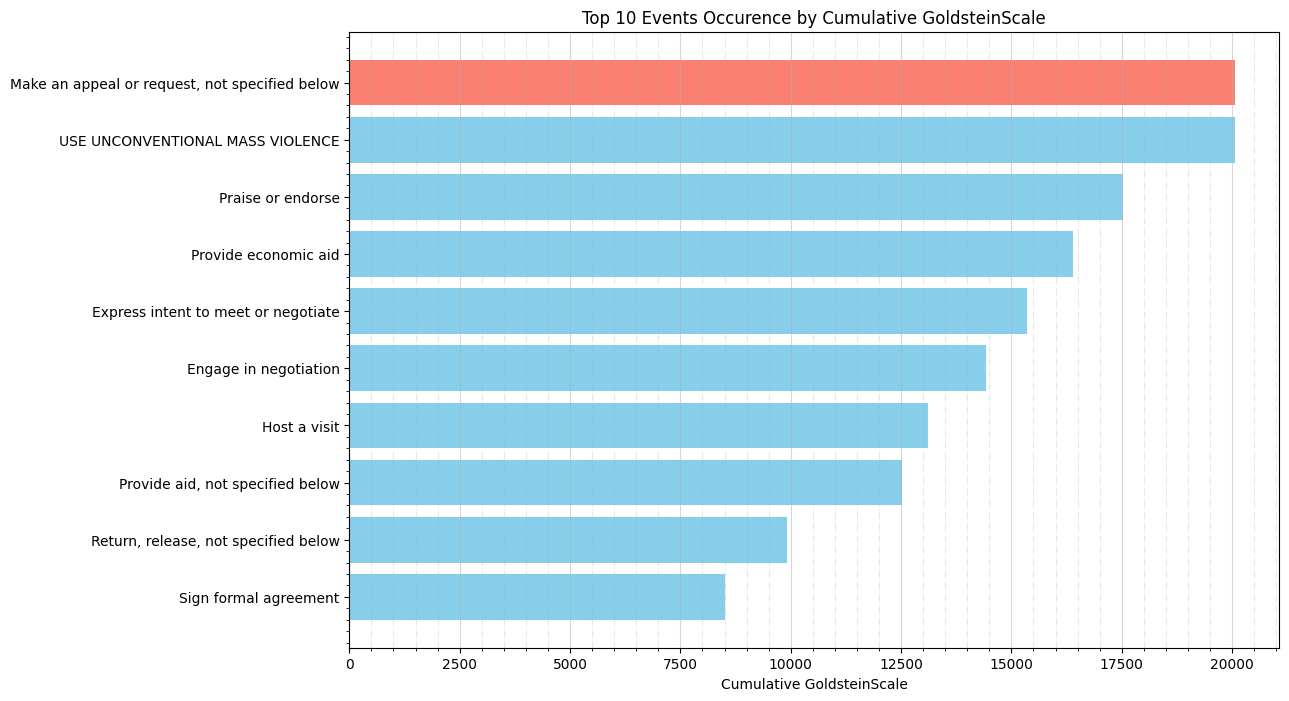

In [117]:
# Sort by GoldsteinScale and get the top 10 events
top_10_events = events_grouped.nlargest(10, 'GoldsteinScale')

# Plot the results
plt.figure(figsize=(12, 8))
plt.barh(top_10_events['Description'], top_10_events['GoldsteinScale'], color='skyblue')
plt.xlabel('Cumulative GoldsteinScale')
plt.title('Top 10 Events Occurence by Cumulative GoldsteinScale')
plt.gca().invert_yaxis()  # Invert y axis to have the highest value at the top
plt.grid(axis='x', linestyle='-.', alpha=0.3, which='minor')  # Add gridlines
plt.grid(axis='x', linestyle='-', alpha=0.5, which='major')  # Add gridlines
plt.minorticks_on()  # Add minor ticks
# Highlight the bars with the highest value
plt.gca().patches[0].set_facecolor('salmon')
plt.show()